## Importing libraries and loading data

In [167]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

# Data quality check
## A quick overview of the data

In [168]:
df_pcr.shape

(8800, 2)

In [169]:
df_patient.shape

(20000, 12)

In [170]:
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [171]:
df_patient.dtypes

patient_id         int64
given_name        object
surname           object
street_number    float64
address_1         object
suburb            object
postcode          object
state             object
date_of_birth    float64
age              float64
phone_number      object
address_2         object
dtype: object

## Patient_id problem

Duplicate ids, Duplicate ids for different people

In [172]:
df_patient.shape

(20000, 12)

In [173]:
df_patient.patient_id.nunique()

19798

In [174]:
df_patient.patient_id.describe()

count     20000.000000
mean     553918.938750
std      260234.961111
min      100005.000000
25%      330194.250000
50%      556327.500000
75%      779419.500000
max      999993.000000
Name: patient_id, dtype: float64

In [175]:
#df_patient[df_patient.duplicated(subset=["patient_id"], keep=False)].set_index("patient_id").sort_index()
df_patient[df_patient.duplicated(subset=["patient_id"], keep=False)].set_index("patient_id").sort_index().head(6)

,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
patient_id,,,,,,,,,,,
109304,zachary,farronato,30.0,outtrim avenue,como,2196,vic,19090801.0,31.0,07 22894061,the reefs
109304,bailey,donaldson,20.0,tardent street,ryde,0812,qld,19580310.0,26.0,07 13479210,None
110207,toby,brock,4.0,merriman crescent,baralaba,3025,nsw,19000424.0,35.0,08 33842007,leitrim
110207,zali,brock,32.0,hedger street,toorak,5038,act,NaN,22.0,08 96818512,None
115791,hannah,clarke,70.0,galmarra street,mayfield,7010,vic,19830828.0,25.0,04 70760611,None
115791,marley,colquhoun,7.0,boolee street,craigie,2534,qld,19000705.0,NaN,04 59547776,None


## Names : Given and Surname

Missing Data, Typos

In [199]:
name_none = df_patient[df_patient.given_name.isnull() | df_patient.surname.isnull()]
name_none.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
11,187498,None,mason,20.0,padbury street,granville,6239,qld,19201021.0,38.0,03 85186450,pioneer lodge
17,429365,None,coffey,1409.0,musson close,beaconsfield upper,5019,wa,NaN,30.0,03 13369308,silverweir
56,573254,None,wilde,3.0,must circuit,ormeau,0800,nsw,19590826.0,37.0,04 40239609,None
59,370936,None,coulson,118.0,murphy street,st agnes,2062,qld,19820225.0,33.0,04 05029557,None
66,168148,kallie,None,18.0,lampard circuit,bassendean,2632,nsw,19380612.0,NaN,02 37706143,None


In [200]:
name_none.shape

(861, 12)

In [225]:
df_patient[["given_name","surname"]].dropna(how="any")

,given_name,surname
0,matisse,clarke
1,joshua,elrick
2,alice,conboy
3,sienna,craswell
4,joshua,bastiaans
5,ky,laing
6,matthew,laing
7,jack,renfrey
8,adele,ryan
9,breeanne,wynne


## Street number

Missing data, wrong datatype, wrong info / typo

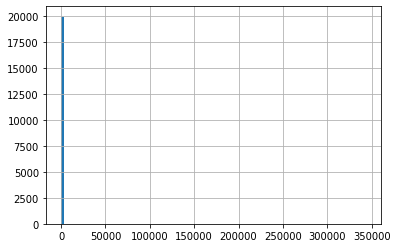

In [40]:
df_patient.street_number.fillna(0, inplace = True)
df_patient.street_number.astype('int', inplace= True)
df_patient.street_number.hist(bins=100)

In [41]:
df_patient.street_number.describe()

count     20000.000000
mean         96.925150
std        2458.128201
min           0.000000
25%           9.000000
50%          24.000000
75%          59.000000
max      342951.000000
Name: street_number, dtype: float64

## Address 1 column

Incorrect input : no space, typos

In [42]:
df_patient.address_1.head()

0            rene street
1           andrea place
2       mountain circuit
3    cumberlegeicrescent
4          lowrie street
Name: address_1, dtype: object

In [43]:
df_patient.address_1.nunique()

4326

In [44]:
df_patient.address_1.unique()

array(['rene street', 'andrea place', 'mountain circuit', ...,
       'collie street', 'halligan place', 'alinda place'], dtype=object)

In [48]:
df_patient.loc[3]

patient_id                    465838
given_name                    sienna
surname                     craswell
street_number                     39
address_1        cumberlegeicrescent
suburb                         henty
postcode                        3620
state                             wa
date_of_birth            1.98408e+07
age                               30
phone_number             02 62832318
address_2                     jodane
Name: 3, dtype: object